## IEG HCR analysis (Figure 4F-H)

This notebook calculates the abundance of Fos in Nts+ cells

#### Import libraries

In [1]:
library(cowplot)
library(reshape2)
library(gridExtra)
library(tidyverse)
library(dplyr)
library(ggplot2)
library(plotly)
library(xlsx)
library(plyr)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.6     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.1.1     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::combine() masks gridExtra::combine()
x dplyr::filter()  masks stats::filter()
x dplyr::lag()     masks stats::lag()


Attaching package: 'plotly'


The following object is masked from 'package:ggplot2':

    last_plot


The following object is masked from 'package:stats':

    filter


The following object is masked from 'package:graphics':

    layout


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr)

#### Load in data file

In [1]:
spots <- readRDS(file='HCR_IEG_files/spots.rds')
spots

section.ident,group,animal,slide,sex,nts.Copies,met.Copies,fos.Copies
<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>
sal_M1s1,sal,A9,S5,male,0,0,7
sal_M1s1,sal,A9,S5,male,0,0,0
sal_M1s1,sal,A9,S5,male,1,0,1
sal_M1s1,sal,A9,S5,male,0,0,0
sal_M1s1,sal,A9,S5,male,0,0,0
sal_M1s1,sal,A9,S5,male,0,0,0
sal_M1s1,sal,A9,S5,male,0,0,11
sal_M1s1,sal,A9,S5,male,0,0,0
sal_M1s1,sal,A9,S5,male,0,0,6


#### Measuring expression differencs and statistics

I chose to keep only the top 15th percentile of NTS spot counts as a threshold for NTS+ cells. This was determined using spatial plots from HALO. Met was determined in a similar fashion. IEGs (readout of MOR and NAL treatment) were treated as total distributions instead (not thresholded)

In [3]:
spots.df <- melt(spots)

Using section.ident, group, animal, slide, sex as id variables



Plotting cumulative relative frequency plots of groups compared against one another. Code isn't fancy. As is, you will have to manually rename variables to plot the genes you want

In [4]:
#for nts+
nts.df <- spots[spots$nts.Copies >= 24 & !spots$met.Copies >= 28,]

In [5]:
#for met+
met.df <- spots[spots$met.Copies >= 24 & !spots$nts.Copies >= 28,]

In [6]:
#also interested in cells negative for both
neg.df <- spots[!spots$nts.Copies >= 24 & !spots$met.Copies >= 28,]

In [7]:
#also interested in cells negative for both
both.df <- spots[spots$nts.Copies >= 24 & spots$met.Copies >= 28,]

#### Violin plots

In [8]:
#both+ cells expressing this gene, grab useful columns
both.fos <- both.df[c("group", "fos.Copies")]

In [9]:
both.fos.sal <- both.fos[both.fos$group == 'sal',]
both.fos.mor <- both.fos[both.fos$group == 'mor',]
both.fos.nal <- both.fos[both.fos$group == 'nal',]

In [10]:
#Factor the column names to control which is plotted first
both.fos$group <- factor(both.fos$group, levels=c('sal','mor','nal'))

In [11]:
#set color scale for groups
color_scale <- c('black','#4392FE','darkorange')

Warning message:
"Removed 466 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 466 rows containing non-finite values (stat_boxplot)."
Warning message:
"position_dodge requires non-overlapping x intervals"
Warning message:
"Removed 466 rows containing non-finite values (stat_ydensity)."
Warning message:
"Removed 466 rows containing non-finite values (stat_boxplot)."
Warning message:
"position_dodge requires non-overlapping x intervals"


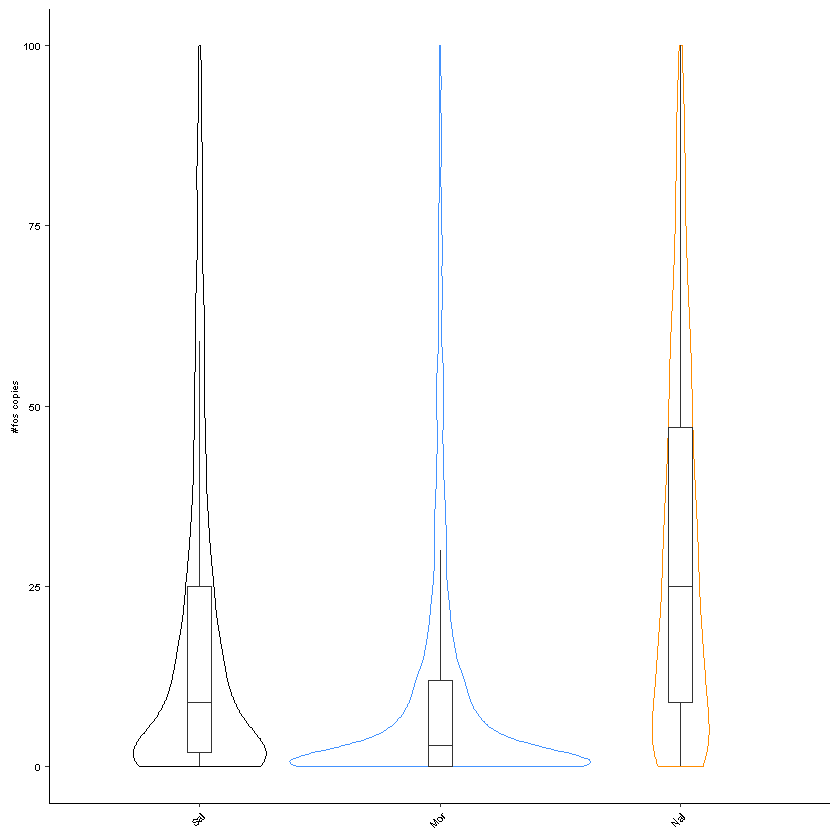

In [12]:
#First, violin + box plots to compare median gene expression
ggplot(both.fos, aes(x=group, y=fos.Copies)) +
    geom_violin(aes(x=group, y=fos.Copies, color=group), size=0.25, width=1.25, ) +
    geom_boxplot(size=0.1,width=0.1, outlier.shape = NA, fill='white')+
    theme_classic() +
    theme(axis.title.y=element_text(size=6,colour = "black"),
          axis.title.x=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6, colour = "black", angle=45, hjust=1),
          axis.line = element_line(size=0.25),
          axis.ticks = element_line(size=0.25),
          legend.position="none") +
    ylab('#fos copies') +
    scale_color_manual(values=color_scale) +
    scale_x_discrete(labels=c("Sal","Mor","Nal")) +
    ylim(c(0,100))
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/IEG_HCR_results/IEG_HCR_results_final/both_fos_vln.pdf', width=1, height=1)

#### CDFs

First, use ggplot and geom_histogram to generate binned data. The SAL, MOR and NAL groups are added to the plot one by one. "y=cumsum(..count..)" is what produces the cumulative couinhba across each group, and this value is divided by the total number of cells in each group ("dim(gene)[1]"). Histograms are forced to be white because they will technically be part of the final graph...but invisible

In [13]:
p <- ggplot(both.fos.sal, aes(x=fos.Copies)) + geom_histogram(aes(y=cumsum(..count..)/dim(both.fos.sal)[1]),fill='white', binwidth=1) +
    geom_histogram(data=both.fos.mor, aes(x=fos.Copies, y=cumsum(..count..)/dim(both.fos.mor)[1]), fill="white", binwidth=1) +
    geom_histogram(data=both.fos.nal, aes(x=fos.Copies, y=cumsum(..count..)/dim(both.fos.nal)[1]), fill="white", binwidth=1) +
    xlim(c(0,300))

In [14]:
#Extracting data from the plotted object. We're going to use this to plot the pretty line for each group
#sal
d <- ggplot_build(p)$data[[1]]
df1 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))

#mor
d <- ggplot_build(p)$data[[2]]
df2 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))

#nal
d <- ggplot_build(p)$data[[3]]
df3 <- data.frame(x = c(0, d$xmax), y = c(0, d$y))

Warning message:
"Removed 19 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 42 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 19 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 42 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 19 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 42 rows containing non-finite values (stat_bin)."


Scale for 'x' is already present. Adding another scale for 'x', which will
replace the existing scale.

Warning message:
"Removed 47 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 75 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 101 row(s) containing missing values (geom_path)."
Warning message:
"Removed 101 row(s) containing missing values (geom_path)."
Warning message:
"Removed 101 row(s) containing missing values (geom_path)."
Warning message:
"Removed 47 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 75 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
Warning message:
"Removed 2 rows containing missing values (geom_bar)."
W

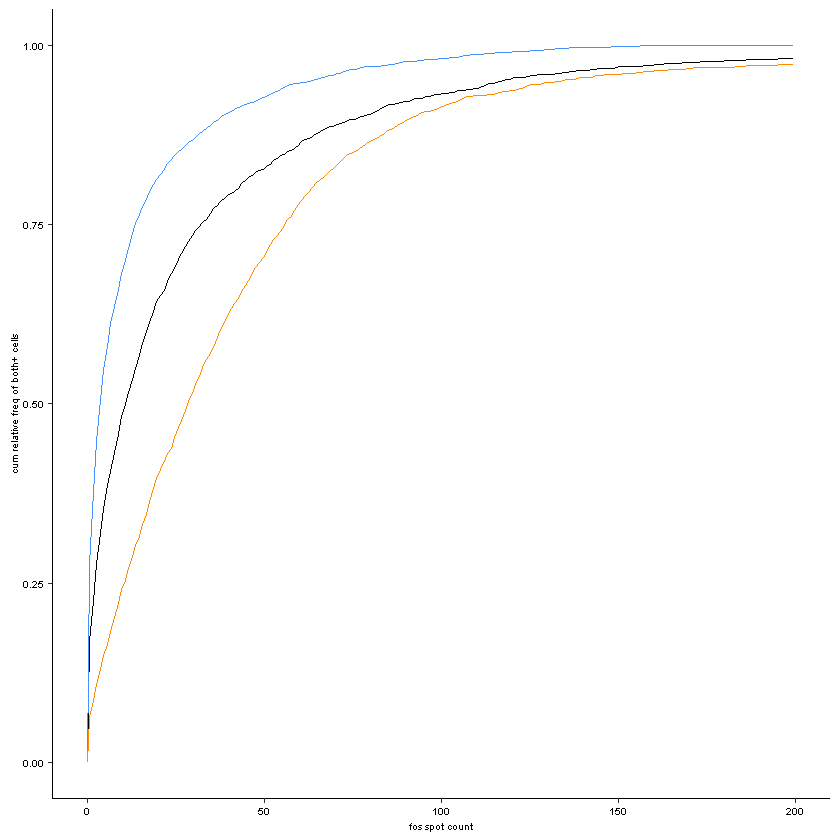

In [15]:
#Second plot that is stacked on the first. This time, geom_line is used for each group
p2<- p + geom_line(data = df1, aes(x = x, y = y), color = "black", size = 0.25) +
    geom_line(data = df2, aes(x = x, y = y), color = "#4392FE", size = 0.25) +
    geom_line(data = df3, aes(x = x, y = y), color = "darkorange", size = 0.25) +
        theme_classic() +
        theme(axis.title.y=element_text(size=6,colour = "black"),
          axis.title.x=element_text(size=6,colour = "black"),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6, colour = "black"),
          axis.line = element_line(size=0.25),
          axis.ticks = element_line(size=0.25)) +
        ylab('cum relative freq of both+ cells') +
        xlab('fos spot count')  + xlim(c(0,200))
p2
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/IEG_HCR_results/IEG_HCR_results_final/both_fos_dist.pdf', width=1.5, height=1.5)

In [16]:
#Now extracting CDF line data to perform two-sample K-S test for each group comparison
#sal
sal.fd <- ggplot_build(p2)$data[[4]][1:101,]$y
#mor
mor.fd <- ggplot_build(p2)$data[[5]][1:101,]$y
#nal
nal.fd <- ggplot_build(p2)$data[[6]][1:101,]$y

Warning message:
"Removed 47 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 75 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 47 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 75 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 47 rows containing non-finite values (stat_bin)."
Warning message:
"Removed 75 rows containing non-finite values (stat_bin)."


In [17]:
test <- ks.test(sal.fd, mor.fd)
test$p.value
test$statistic
#number of comparisons are predetermined
#extracting p-values for each comparison

Warning message in ks.test(sal.fd, mor.fd):
"p-value will be approximate in the presence of ties"


[1] 9.481149e-11

D 
0.4851485

In [18]:
test <- ks.test(mor.fd, nal.fd)
test$p.value
test$statistic
#number of comparisons are predetermined
#extracting p-values for each comparison

Warning message in ks.test(mor.fd, nal.fd):
"p-value will be approximate in the presence of ties"


[1] 2.14273e-14

D 
0.5643564

#### Linear mixed effects modeling

Reload the data

In [19]:
spots <- readRDS('HCR_IEG_files/spots.rds')

In [25]:
#for nts+
nts.df <- spots[spots$nts.Copies >= 24 & !spots$met.Copies >= 28,]

In [26]:
#for met+
met.df <- spots[spots$met.Copies >= 24 & !spots$nts.Copies >= 28,]

In [27]:
#also interested in cells negative for both
neg.df <- spots[!spots$nts.Copies >= 24 & !spots$met.Copies >= 28,]

In [28]:
#also interested in cells negative for both
both.df <- spots[spots$nts.Copies >= 24 & spots$met.Copies >= 28,]

Linear mixed effects modeling for statistical analysis

In [29]:
library(lme4)
library(lmerTest)

Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Warning message:
"package 'lmerTest' was built under R version 4.1.3"

Attaching package: 'lmerTest'


The following object is masked from 'package:lme4':

    lmer


The following object is masked from 'package:stats':

    step




In [30]:
#set seed for reproducibility
set.seed(1546)

In [31]:
both.spots.all$group <- factor(both.spots.all$group, levels=c('sal','mor','nal'))

both.spots.all$group <- relevel(both.spots.all$group, ref = 2)

both.spots.all$fos.Copies <- log(both.spots.all$fos.Copies)

both.spots.all$fos.Copies[is.infinite(both.spots.all$fos.Copies)] <- NA

In [32]:
Dat1 <- lmer(fos.Copies ~ group + (1 | sex) + (1 | slide) + (1 | animal), both.spots.all)
summary(Dat1)

boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: fos.Copies ~ group + (1 | sex) + (1 | slide) + (1 | animal)
   Data: both.spots.all

REML criterion at convergence: 111975.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.5774 -0.6806  0.0389  0.7105  3.5535 

Random effects:
 Groups   Name        Variance Std.Dev.
 animal   (Intercept) 0.1645   0.4056  
 slide    (Intercept) 0.0000   0.0000  
 sex      (Intercept) 0.1255   0.3543  
 Residual             1.5981   1.2642  
Number of obs: 33842, groups:  animal, 12; slide, 6; sex, 2

Fixed effects:
            Estimate Std. Error     df t value Pr(>|t|)  
(Intercept)   1.8915     0.3226 1.8191   5.864   0.0346 *
groupsal      0.7804     0.2874 8.0176   2.715   0.0264 *
groupnal      0.8598     0.2873 8.0087   2.992   0.0173 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Correlation of Fixed Effects:
         (Intr) gropsl
groupsal -0.445       
groupnal 

In [34]:
saveRDS(Dat1, file='C:/Users/stuberadmin/Documents/HCR_analysis/IEG_HCR_results/IEG_HCR_results_final/both_fos_lme_stats.rds')

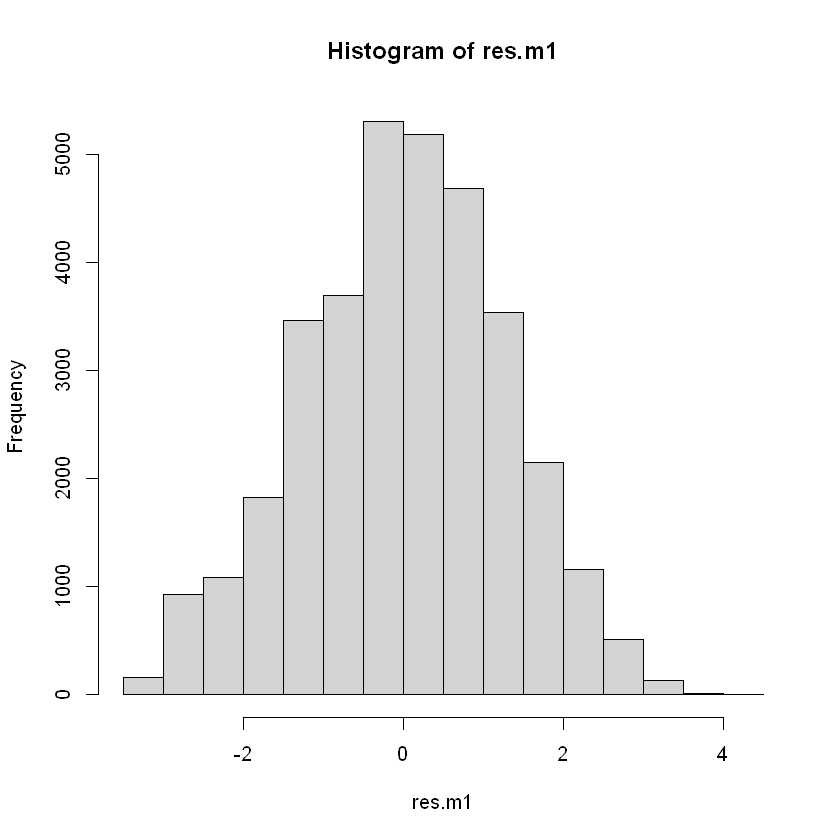

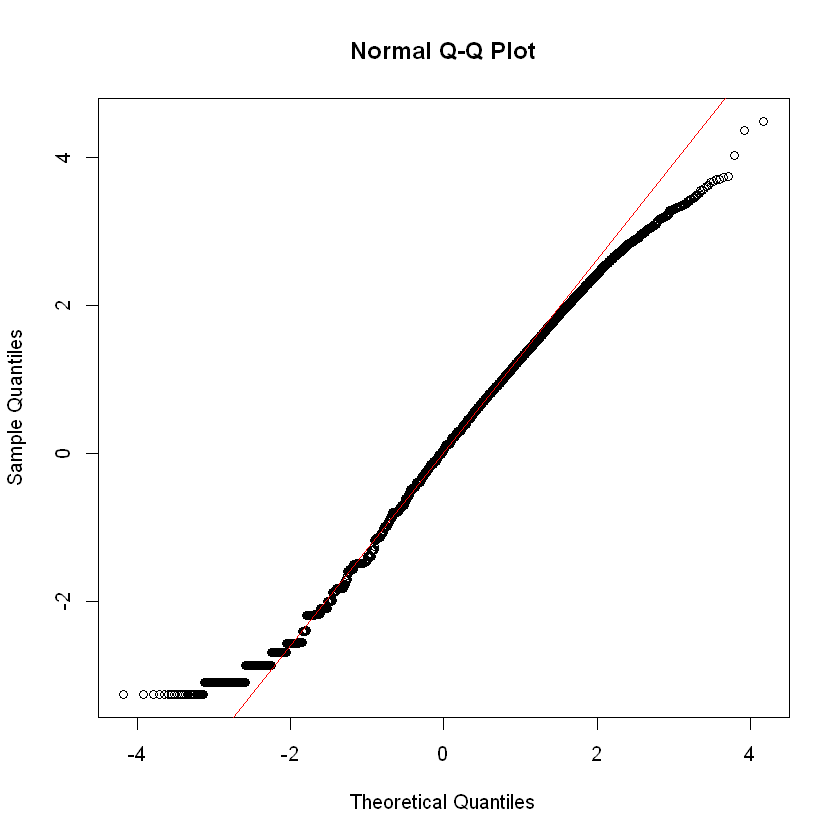

In [35]:
# Check residuals
res.m1 <- residuals(Dat1)
hist(res.m1)

qqnorm(res.m1)
qqline(res.m1, col="red")

#### Plotting the average expression across sections

In [49]:
#also interested in cells negative for both
both.spots.all <- spots[spots$nts.Copies >= 24 & spots$met.Copies >= 28,]

In [50]:
sections <- unique(both.spots.all$section.ident)

In [51]:
saline.sections <- sections[grep("sal", sections)]
morphine.sections <- sections[grep("mor", sections)]
naloxone.sections<- sections[grep("nal", sections)]

In [52]:
sal.med <- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(saline.sections)) {
    sal.med.gene <- apply(both.spots.all[both.spots.all$section.ident==saline.sections[i],][,6:8], 2, median, na.rm=T)
    sal.med<- rbind(sal.med, sal.med.gene)
}

mor.med <- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(saline.sections)) {
    mor.med.gene <- apply(both.spots.all[both.spots.all$section.ident==morphine.sections[i],][,6:8], 2, median, na.rm=T)
    mor.med<- rbind(mor.med, mor.med.gene)
}

nal.med <- data.frame(Date=as.Date(character()),File=character(),User=character(),stringsAsFactors=FALSE)
for (i in 1:length(saline.sections)) {
    nal.med.gene <- apply(both.spots.all[both.spots.all$section.ident==naloxone.sections[i],][,6:8], 2, median, na.rm=T)
    nal.med<- rbind(nal.med, nal.med.gene)
}

In [53]:
colnames(sal.med) <- colnames(both.spots.all[,6:8])
colnames(mor.med) <- colnames(both.spots.all[,6:8])
colnames(nal.med) <- colnames(both.spots.all[,6:8])

In [54]:
fos.sal.med <- as.data.frame(sal.med$fos.Copies)
fos.sal.med$group <- 'sal'
colnames(fos.sal.med) <- c('fos','group')
#removing outliers
#fos.sal.med <- ifelse(length(fos.sal.outlier)==0, fos.sal.med, fos.sal.med[fos.sal.med < fos.sal.outlier,])
fos.sal.med <- data.frame('fos'=fos.sal.med, 'group'='sal')
colnames(fos.sal.med) <- c('fos','group')

fos.mor.med <- as.data.frame(mor.med$fos.Copies)
fos.mor.med$group <- 'mor'
colnames(fos.mor.med) <- c('fos','group')
#fos.mor.med <- ifelse(length(fos.mor.outlier)==0, fos.mor.med, fos.mor.med[fos.mor.med < fos.mor.outlier,])
fos.mor.med <- data.frame('fos'=fos.mor.med, 'group'='mor')
colnames(fos.mor.med) <- c('fos','group')

fos.nal.med <- as.data.frame(nal.med$fos.Copies)
fos.nal.med$group <- 'nal'
colnames(fos.nal.med) <- c('fos','group')
#fos.nal.outlier <- boxplot.stats(fos.nal.med$fos)$out
#fos.nal.med <- ifelse(length(fos.nal.outlier)==0, fos.nal.med, fos.nal.med[fos.nal.med < fos.nal.outlier,])
fos.nal.med <- data.frame('fos'=fos.nal.med, 'group'='nal')
colnames(fos.nal.med) <- c('fos','group')

In [55]:
test.df<-rbind(fos.sal.med, fos.mor.med, fos.nal.med)

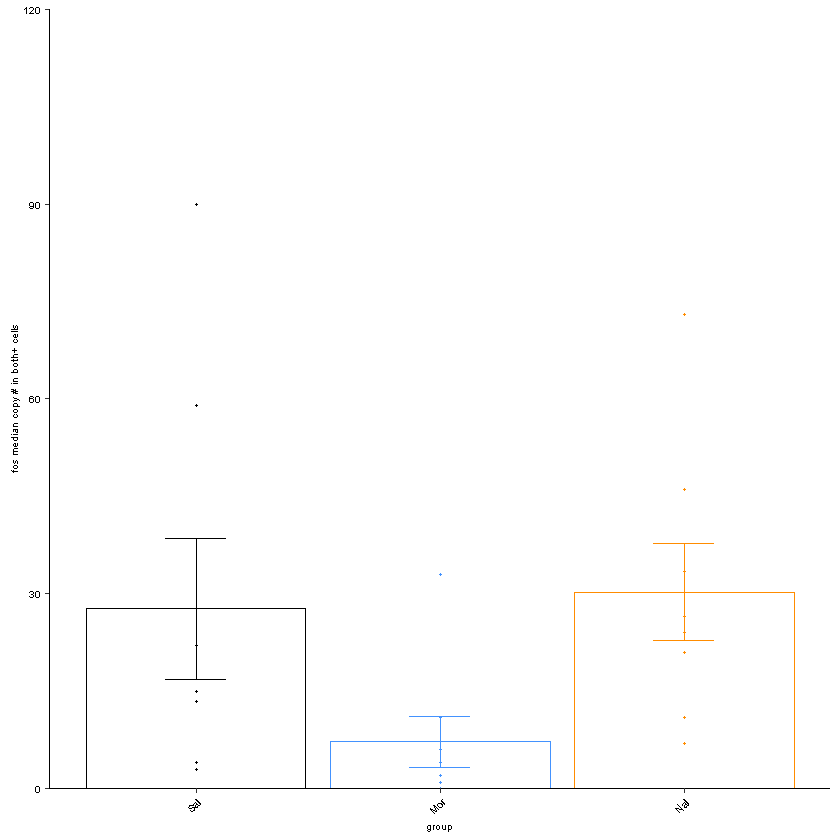

In [58]:
#First, violin + box plots to compare median gene expression
color_scale <- c('black','#4392FE','darkorange')
test.df$group <- factor(test.df$group, levels=c('sal','mor','nal'))

ggplot(test.df, aes(x=group, y=fos)) +
    geom_bar(aes(x=group, y=fos, color=group),stat='summary', fun=mean, size=0.25, fill='white') +
    geom_point(aes(x=group, y=fos, color=group), size=0.5)+
    stat_summary(aes(x=group, y=fos, color=group),fun.data = mean_se, geom = "errorbar", width=0.25, size=0.25)+
    theme_classic() +
    theme(axis.title.y=element_text(size=6,colour = "black"),
          axis.title.x=element_text(size=6, color='black'),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6, colour = "black", angle=45, hjust=1),
          axis.line = element_line(size=0.25),
          axis.ticks = element_line(size=0.25),
          legend.position="none") +
    ylab('fos median copy # in both+ cells') +
    scale_color_manual(values=color_scale) +
    scale_x_discrete(labels=c("Sal","Mor","Nal")) +
    scale_y_continuous(expand=c(0,0), limits=c(0, 120))
ggsave('C:/Users/stuberadmin/Documents/HCR_analysis/IEG_HCR_results/IEG_HCR_results_final/both_fos_bar.pdf', width=0.75, height=1.5)